# Tests for Build_OBM
This file is meant to test out individual code before scripting in the main repo. Do not use for running the occupant behavior model.

## Import packages

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import gc
import csv
import pickle
from tools_ipynb import *

## Read data

In [3]:
# Read a DyD file
df = pd.read_csv("C:/devel/Build_OBM/data/home_1.csv")
df.head(3)

,Unnamed: 0,Schedule,Event,T_ctrl [oF],T_stp_cool [oF],T_stp_heat [oF],Humidity,HumidityExpectedLow,HumidityExpectedHigh,Thermostat_Temperature [oF],...,Remote_Sensor_9_Temperature [oF],Remote_Sensor_9_Motion,Remote_Sensor_10_Temperature [oF],Remote_Sensor_10_Motion,Remote_Sensor_11_Temperature [oF],Remote_Sensor_11_Motion,Remote_Sensor_12_Temperature [oF],Remote_Sensor_12_Motion,Remote_Sensor_13_Temperature [oF],Remote_Sensor_13_Motion
0,2017-09-01 00:00:00,custom_3,Hold,73.3,73.0,63.0,51.0,0.0,0.0,73.2,...,74.5,0.0,73.4,0.0,72.0,0.0,72.1,0.0,74.1,0.0
1,2017-09-01 00:05:00,custom_3,Hold,73.3,73.0,63.0,51.0,0.0,0.0,73.3,...,74.5,0.0,73.4,0.0,72.0,0.0,72.1,0.0,74.1,0.0
2,2017-09-01 00:10:00,custom_3,Hold,73.3,73.0,63.0,51.0,0.0,0.0,73.3,...,74.4,0.0,73.4,0.0,72.0,0.0,72.1,0.0,74.1,0.0


## Preprocessing data

In [4]:
# varInfo_1 = {'Unnamed: 0': 'DateTime' ,'Event': 'event' ,'Humidity': 'hum' ,'HumidityExpectedHigh': 'humExpHi' ,'HumidityExpectedLow': 'humExpLo' ,'RH_out': 'RH_out' ,'Remote_Sensor_1_Motion': 'RS1Mo' ,'Remote_Sensor_1_Temperature [oF]': 'RS1T' ,'Remote_Sensor_2_Motion': 'RS2Mo' ,'Remote_Sensor_2_Temperature [oF]': 'RS2T','Remote_Sensor_3_Motion': 'RS3Mo' ,'Remote_Sensor_3_Temperature [oF]': 'RS3T' ,'Remote_Sensor_4_Motion': 'RS4Mo' ,'Remote_Sensor_4_Temperature [oF]': 'RS4T' ,'Remote_Sensor_5_Motion': 'RS5Mo' ,'Remote_Sensor_5_Temperature [oF]': 'RS5T' ,'Remote_Sensor_6_Motion': 'RS6Mo' ,'Remote_Sensor_6_Temperature [oF]': 'RS6T' ,'Remote_Sensor_7_Motion': 'RS7Mo' ,'Remote_Sensor_7_Temperature [oF]': 'RS7T' ,'Remote_Sensor_8_Motion': 'RS8Mo' ,'Remote_Sensor_8_Temperature [oF]': 'RS8T','Remote_Sensor_9_Motion': 'RS9T' ,'Remote_Sensor_9_Temperature [oF]': 'RS9Mo' ,'Remote_Sensor_10_Motion': 'RS10T' ,'Remote_Sensor_10_Temperature [oF]': 'RS10Mo' ,'Remote_Sensor_11_Motion': 'RS11T' ,'Remote_Sensor_11_Temperature [oF]': 'RS11Mo' ,'Remote_Sensor_12_Motion': 'RS12T' ,'Remote_Sensor_12_Temperature [oF]': 'RS12Mo' ,'Remote_Sensor_13_Motion': 'RS13T' ,'Remote_Sensor_13_Temperature [oF]': 'RS13Mo' ,'Schedule': 'schedule' ,'T_ctrl [oF]': 'T_ctrl' ,'T_out [oF]': 'T_out' ,'T_stp_cool [oF]': 'T_stp_cool' ,'T_stp_heat [oF]': 'T_stp_heat' ,'Thermostat_Motion': 'TSMo' ,'Thermostat_Temperature [oF]': 'TST' ,'auxHeat1 [sec]': 'auxHeat1' ,'auxHeat2 [sec]': 'auxHeat2' ,'auxHeat3 [sec]': 'auxHeat3' ,'compCool1 [sec]': 'cmpCool1' ,'compCool2 [sec]': 'cmpCool2' ,'compCool3 [sec]': 'cmpCool3' ,'compHeat1 [sec]': 'cmpHeat1' ,'compHeat2 [sec]': 'cmpHeat2' ,'compHeat3 [sec]': 'cmpHeat3' ,'dehumidifier': 'dehumidifier','fan [sec]': 'fan' ,'humidifier': 'humidifier' ,'ventilator': 'ventilator'}
varInfo = { 'Header in CSV':['Unnamed: 0', 'Event','Humidity', 'HumidityExpectedHigh', 'HumidityExpectedLow','RH_out','Remote_Sensor_1_Motion','Remote_Sensor_1_Temperature [oF]','Remote_Sensor_2_Motion','Remote_Sensor_2_Temperature [oF]','Remote_Sensor_3_Motion','Remote_Sensor_3_Temperature [oF]',
'Remote_Sensor_4_Motion', 'Remote_Sensor_4_Temperature [oF]', 'Remote_Sensor_5_Motion', 'Remote_Sensor_5_Temperature [oF]', 'Remote_Sensor_6_Motion', 'Remote_Sensor_6_Temperature [oF]', 'Remote_Sensor_7_Motion', 'Remote_Sensor_7_Temperature [oF]', 'Remote_Sensor_8_Motion', 'Remote_Sensor_8_Temperature [oF]',
'Remote_Sensor_9_Motion', 'Remote_Sensor_9_Temperature [oF]', 'Remote_Sensor_10_Motion', 'Remote_Sensor_10_Temperature [oF]', 'Remote_Sensor_11_Motion', 'Remote_Sensor_11_Temperature [oF]', 'Remote_Sensor_12_Motion', 'Remote_Sensor_12_Temperature [oF]', 'Remote_Sensor_13_Motion', 'Remote_Sensor_13_Temperature [oF]',
'Schedule', 'T_ctrl [oF]', 'T_out [oF]', 'T_stp_cool [oF]', 'T_stp_heat [oF]', 'Thermostat_Motion', 'Thermostat_Temperature [oF]', 'auxHeat1 [sec]', 'auxHeat2 [sec]', 'auxHeat3 [sec]', 'compCool1 [sec]', 'compCool2 [sec]', 'compCool3 [sec]', 'compHeat1 [sec]', 'compHeat2 [sec]', 'compHeat3 [sec]', 'dehumidifier', 'fan [sec]',
'humidifier', 'ventilator'],
 'VariableName':['DateTime', 'event', 'hum', 'humExpHi','humExpLo' ,'RH_out' ,'RS1Mo' ,'RS1T' ,'RS2Mo' ,'RS2T' ,'RS3Mo' ,'RS3T' ,'RS4Mo' ,'RS4T' ,'RS5Mo' ,'RS5T' ,'RS6Mo' ,'RS6T' ,'RS7Mo' ,'RS7T' ,'RS8Mo' ,'RS8T',
 'RS9Mo', 'RS9T' ,'RS10Mo' ,'RS10T' ,'RS11Mo' ,'RS11T' ,'RS12Mo' ,'RS12T' ,'RS13Mo' ,'RS13T' ,'schedule' ,'T_ctrl' ,'T_out' ,'T_stp_cool' ,'T_stp_heat' ,'TSMo' ,'TST' ,'auxHeat1' ,'auxHeat2' ,'auxHeat3' ,'cmpCool1' ,'cmpCool2' ,'cmpCool3' ,'cmpHeat1' ,'cmpHeat2' ,'cmpHeat3' ,'dehumidifier' ,'fan' ,'humidifier' ,'ventilator'],
 'Type':['datetime', 'categorical', 'double', 'double','float' ,'float' ,'float' ,'float' ,'float' ,'float' ,'float' ,'float' ,'float' ,'float' ,'float' ,'float' ,'float' ,'float' ,'float' ,'float' ,'float' ,'float' ,'float' ,'float' ,'float' ,'float' ,'float' ,'float' ,'float' ,'float' ,'float' ,'float' ,'categorical' ,'float' ,'float' ,'float' ,'float' ,'float' ,'float' ,'float' ,'float' ,'float' ,'float' ,'float' ,'float' ,'float' ,'float' ,'float' ,'float' ,'float' ,'float' ,'float'],
 'Unit':['', '', '%', '%','%' ,'%' ,'' ,'oF' ,'' ,'oF' ,'' ,'oF' ,'' ,'oF' ,'' ,'oF' ,'' ,'oF' ,'' ,'oF' ,'' ,'oF' ,'' ,'oF' ,'' ,'oF' ,'' ,'oF' ,'' ,'oF' ,'' ,'oF' ,'' ,'oF' ,'oF' ,'oF' ,'oF' ,'' ,'F' ,'s' ,'s' ,'s' ,'s' ,'s' ,'s' ,'s' ,'s' ,'s' ,'' ,'s' ,'' ,''],
 'Description':['Date and time that the reading was taken', 'Anything that modifies the schedule (e.g. A temperature hold, demand response event, Vacation, SmartRecovery feature)',
                'Indoor humidity (in RH%)', 'Setpoint (for users who have a Humidifier) (in RH%)','Setpoint (for users who have a Humidifier) (in RH%)' ,'' ,'Detects motion (binary) at that date/time at the remote sensor 1' ,'Indoor temperature measurement at the remote sensor 1' ,'Detects motion (binary) at that date/time at the remote sensor 2' ,'Indoor temperature measurement at the remote sensor 2' ,'Detects motion (binary) at that date/time at the remote sensor 3' ,'Indoor temperature measurement at the remote sensor 3' ,'Detects motion (binary) at that date/time at the remote sensor 4' ,'Indoor temperature measurement at the remote sensor 4' ,'Detects motion (binary) at that date/time at the remote sensor 5' ,'Indoor temperature measurement at the remote sensor 5' ,'Detects motion (binary) at that date/time at the remote sensor 6' ,'Indoor temperature measurement at the remote sensor 6' ,'Detects motion (binary) at that date/time at the remote sensor 7' ,'Indoor temperature measurement at the remote sensor 7' ,'Detects motion (binary) at that date/time at the remote sensor 8' ,'Indoor temperature measurement at the remote sensor 8' ,'Detects motion (binary) at that date/time at the remote sensor 9' ,'Indoor temperature measurement at the remote sensor 9' ,'Detects motion (binary) at that date/time at the remote sensor 10' ,'Indoor temperature measurement at the remote sensor 10' ,'Detects motion (binary) at that date/time at the remote sensor 11' ,'Indoor temperature measurement at the remote sensor 11' ,'Detects motion (binary) at that date/time at the remote sensor 12' ,'Indoor temperature measurement at the remote sensor 12' ,'Detects motion (binary) at that date/time at the remote sensor 13' ,'Indoor temperature measurement at the remote sensor 13' ,'Fields include things like Vacation, Sleep, Away, Nap, etc. which are user-defined descriptors for desired set points against activity/behaviour' ,'Average indoor temperature based on relevant sensors as defined by the schedule or mode the user is in' ,'Outdoor temperate for nearest weather station' ,'Indoor cool setpoint' ,'Indoor heat setpoint' ,'Detects motion (binary) at that date/time' ,'Indoor measurement at the thermostat (I.e. Not remote sensor)' ,'Runtime (seconds) of stage 1 of any heat source other than a heat pump' ,'Runtime (seconds) of stage 2 of any heat source other than a heat pump' ,'Runtime (seconds) of stage 3 of any heat source other than a heat pump' ,'Runtime (seconds) for any cooling stage 1' ,'Runtime (seconds) for any cooling stage 2' ,'Runtime (seconds) for any cooling stage 3' ,'Runtime (seconds) for stage 1 of heat-pumps used in heating' ,'Runtime (seconds) for stage 2 of heat-pumps used in heating' ,'Runtime (seconds) for stage 3 of heat-pumps used in heating' ,'' ,'Runtime (seconds) for fan' ,'' ,'']}
df_var = pd.DataFrame.from_dict(varInfo)
df_var.set_index('Header in CSV',inplace=True)
columns2replace = df_var['VariableName'].to_dict()
df = df.rename(columns=columns2replace)
df.columns


Index(['DateTime', 'schedule', 'event', 'T_ctrl', 'T_stp_cool', 'T_stp_heat',
       'hum', 'humExpLo', 'humExpHi', 'TST', 'TSMo', 'T_out', 'RH_out',
       'cmpCool1', 'cmpHeat1', 'fan', 'RS1T', 'RS1Mo', 'RS2T', 'RS2Mo', 'RS3T',
       'RS3Mo', 'RS4T', 'RS4Mo', 'RS5T', 'RS5Mo', 'RS6T', 'RS6Mo', 'RS7T',
       'RS7Mo', 'RS8T', 'RS8Mo', 'RS9T', 'RS9Mo', 'RS10T', 'RS10Mo', 'RS11T',
       'RS11Mo', 'RS12T', 'RS12Mo', 'RS13T', 'RS13Mo'],
      dtype='object')

Reduce the number of columns:

In [5]:
# Add motion column that aggregates all motion data into a boolean value
def agg_data(columns,row):
    return row[columns].any()

motion_colmns =[x for x in df.columns if 'Mo' in x]
df['mo'] = df.apply(lambda row: agg_data(motion_colmns,row), axis=1)
heating_equip_columns = ['auxHeat1' ,'auxHeat2' ,'auxHeat3','cmpHeat1' ,'cmpHeat2' ,'cmpHeat3']
cooling_equip_columns = ['cmpCool1' ,'cmpCool2' ,'cmpCool3']
heat_colmns = [x for x in df.columns if x in heating_equip_columns]
cool_colmns = [x for x in df.columns if x in cooling_equip_columns]

# 'auxHeat1' ,'auxHeat2' ,'auxHeat3' ,'cmpCool1' ,'cmpCool2' ,'cmpCool3' ,'cmpHeat1' ,'cmpHeat2' ,'cmpHeat3' 
df['equip_run_heat'] = df.apply(lambda row: agg_data(heat_colmns,row), axis=1)
df['equip_run_cool'] = df.apply(lambda row: agg_data(cool_colmns,row), axis=1)
# Change string series to datetime series
df['DateTime'] = pd.to_datetime(df['DateTime'])
df['schedule'] = df['schedule'].astype("category")
df['event'] = df['event'].astype("category")
df_new = df.copy()
cols_2_keep = ['DateTime', 'schedule', 'event', 'T_ctrl', 'T_stp_cool', 'T_stp_heat',
       'hum', 'T_out', 'equip_run_heat','equip_run_cool', 'fan','mo']
df_new.drop(df_new.columns.difference(cols_2_keep), 1, inplace=True)
df.head()

c:\tools\Anaconda3\envs\build_obm\lib\site-packages\ipykernel_launcher.py:22: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


,DateTime,schedule,event,T_ctrl,T_stp_cool,T_stp_heat,hum,humExpLo,humExpHi,TST,...,RS10Mo,RS11T,RS11Mo,RS12T,RS12Mo,RS13T,RS13Mo,mo,equip_run_heat,equip_run_cool
0,2017-09-01 00:00:00,custom_3,Hold,73.3,73.0,63.0,51.0,0.0,0.0,73.2,...,0.0,72.0,0.0,72.1,0.0,74.1,0.0,False,False,False
1,2017-09-01 00:05:00,custom_3,Hold,73.3,73.0,63.0,51.0,0.0,0.0,73.3,...,0.0,72.0,0.0,72.1,0.0,74.1,0.0,False,False,False
2,2017-09-01 00:10:00,custom_3,Hold,73.3,73.0,63.0,51.0,0.0,0.0,73.3,...,0.0,72.0,0.0,72.1,0.0,74.1,0.0,False,False,False
3,2017-09-01 00:15:00,custom_3,Hold,73.2,73.0,63.0,52.0,0.0,0.0,73.3,...,0.0,72.0,0.0,72.1,0.0,74.1,0.0,False,False,False
4,2017-09-01 00:20:00,custom_3,Hold,73.2,73.0,63.0,52.0,0.0,0.0,73.2,...,0.0,72.0,0.0,72.1,0.0,74.1,0.0,False,False,False


### Save/read to/from hdf5 format for easy load

In [6]:
df_new.to_hdf('sample_data1.h5', key='df_new', mode='w',format="table")
del [[df,df_new]]
gc.collect()

81

In [7]:
df_read = pd.read_hdf('sample_data1.h5')
df_read.head()

,DateTime,schedule,event,T_ctrl,T_stp_cool,T_stp_heat,hum,T_out,fan,mo,equip_run_heat,equip_run_cool
0,2017-09-01 00:00:00,custom_3,Hold,73.3,73.0,63.0,51.0,60.3,0.0,False,False,False
1,2017-09-01 00:05:00,custom_3,Hold,73.3,73.0,63.0,51.0,60.3,0.0,False,False,False
2,2017-09-01 00:10:00,custom_3,Hold,73.3,73.0,63.0,51.0,60.3,0.0,False,False,False
3,2017-09-01 00:15:00,custom_3,Hold,73.2,73.0,63.0,52.0,60.3,0.0,False,False,False
4,2017-09-01 00:20:00,custom_3,Hold,73.2,73.0,63.0,52.0,60.3,0.0,False,False,False


# EDA: Visualize setpoint data prior to cleaning 

<AxesSubplot:xlabel='DateTime', ylabel='mo'>

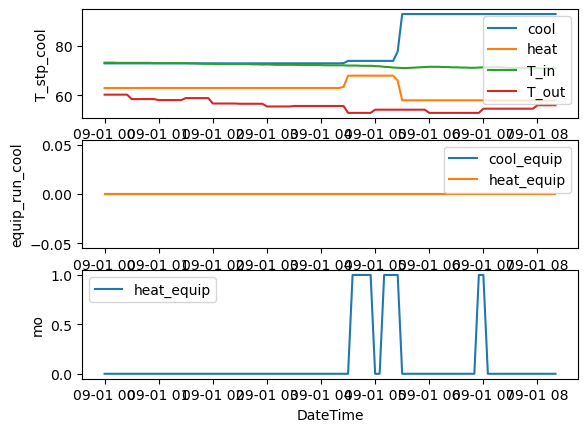

In [8]:
s_idx = 0
e_idx = 100
f,axes = plt.subplots(3,1)
sns.lineplot(x=df_read.loc[s_idx:e_idx]['DateTime'],y=df_read.loc[s_idx:e_idx]['T_stp_cool'],label='cool', ax=axes[0])
sns.lineplot(x=df_read.loc[s_idx:e_idx]['DateTime'],y=df_read.loc[s_idx:e_idx]['T_stp_heat'],label='heat',ax = axes[0])
sns.lineplot(x=df_read.loc[s_idx:e_idx]['DateTime'],y=df_read.loc[s_idx:e_idx]['T_ctrl'],label='T_in',ax=axes[0])
sns.lineplot(x=df_read.loc[s_idx:e_idx]['DateTime'],y=df_read.loc[s_idx:e_idx]['T_out'],label='T_out',ax=axes[0])
sns.lineplot(x=df_read.loc[s_idx:e_idx]['DateTime'],y=df_read.loc[s_idx:e_idx]['equip_run_cool'],label='cool_equip',ax =axes[1])
sns.lineplot(x=df_read.loc[s_idx:e_idx]['DateTime'],y=df_read.loc[s_idx:e_idx]['equip_run_heat'],label='heat_equip', ax=axes[1])
sns.lineplot(x=df_read.loc[s_idx:e_idx]['DateTime'],y=df_read.loc[s_idx:e_idx]['mo'],label='heat_equip', ax=axes[2])


In [9]:
def smooth_setpoints(df,column):
    idx_DSP = df[df[column].diff() != 0].index.values
    idx_DSP_diff = np.diff(idx_DSP)
    idxes_2_begin = []
    idxes_2_end = []
    temp_idx = -1
    # Iterate over the difference of index values were dsp was found
    for idx, diff_value in enumerate(idx_DSP_diff):
        if idx <= temp_idx:
            continue
        
        # If the DSPs exists closely
        if diff_value < 3:

            idx_2_begin = idx_DSP[idx]
            idx_2_end = idx_DSP[idx+1]
            # Scan when the last consecutive DSP occurs
            for next_idx, next_idx_diff in enumerate(idx_DSP_diff[idx+1:]):
                if next_idx_diff <2:
                    idx_2_end = idx_DSP[idx+next_idx+2]
                    temp_idx = idx + next_idx + 1
                else:
                    break

            idxes_2_begin.append(idx_2_begin)
            idxes_2_end.append(idx_2_end)

    print(f"Starting and ending indices list differ by {len(idxes_2_begin)-len(idxes_2_end)}")
    return idxes_2_begin, idxes_2_end

In [10]:
stp_colmns = ['T_stp_cool', 'T_stp_heat']
for colm in stp_colmns:
    idxes_2_begin, idxes_2_end = smooth_setpoints(df_read,colm)
    for idx in range(0,len(idxes_2_begin)):
        start_idx = idxes_2_begin[idx]
        end_idx = idxes_2_end[idx]
        
        df_read.loc[start_idx:end_idx,colm] = df_read.iloc[end_idx][colm]

Starting and ending indices list differ by 0
Starting and ending indices list differ by 0


# EDA: Visualize setpoint data after stepoint smoothing

<AxesSubplot:xlabel='DateTime', ylabel='equip_run_cool'>

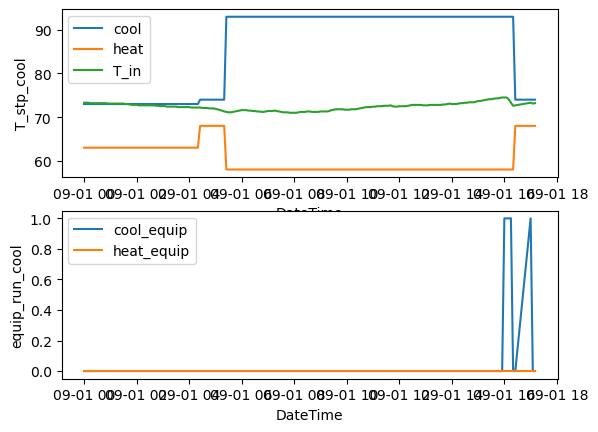

In [11]:
s_idx = 0
e_idx = 200
f,axes = plt.subplots(2,1)
sns.lineplot(x=df_read.loc[s_idx:e_idx]['DateTime'],y=df_read.loc[s_idx:e_idx]['T_stp_cool'],label='cool', ax=axes[0])
sns.lineplot(x=df_read.loc[s_idx:e_idx]['DateTime'],y=df_read.loc[s_idx:e_idx]['T_stp_heat'],label='heat',ax = axes[0])
sns.lineplot(x=df_read.loc[s_idx:e_idx]['DateTime'],y=df_read.loc[s_idx:e_idx]['T_ctrl'],label='T_in',ax=axes[0])
sns.lineplot(x=df_read.loc[s_idx:e_idx]['DateTime'],y=df_read.loc[s_idx:e_idx]['equip_run_cool'],label='cool_equip',ax =axes[1])
sns.lineplot(x=df_read.loc[s_idx:e_idx]['DateTime'],y=df_read.loc[s_idx:e_idx]['equip_run_heat'],label='heat_equip', ax=axes[1])

## Save smooth data seperately

In [12]:
df_read.to_hdf('sample_data1_stp_processed.h5', key='df_read', mode='w',format="table")

# ML

### Routine based habitual overrides
Create a weekday dataframe specifically for extracting transition matrices 

In [13]:
df_read['mdsp'] = (df_read['T_stp_heat'].diff() != 0) | (df_read['T_stp_cool'].diff() != 0) & (df_read['event'] == 'Hold')
df_read['dsp'] = (df_read['T_stp_heat'].diff() != 0) | (df_read['T_stp_cool'].diff() != 0)
weekday_df = df_read.loc[df_read.DateTime.dt.weekday < 5].copy()
weekend_df = df_read.loc[df_read.DateTime.dt.weekday > 5].copy()

### Extract transition matrices from the data

In [14]:
# TM = []
# for timestep in range(0,288):
#     TM.append([timestep, 0, 0, 0])
#     TM.append([timestep, 1, 0, 0])

# TM = pd.DataFrame(TM,columns=['time','cur_state','p_2_0','p_2_1'])
# TM = extract_TM_DyD(TM, weekday_df, df_read)
# TM.to_csv('TM_habitual.csv',index=False)

### Discomfort based override model

### Random forest classification model

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler

y = weekday_df['mdsp'].copy()
X = weekday_df.drop('mdsp',axis=1).copy()
X = X.drop(['DateTime','schedule','event','dsp','fan'],axis=1)
print(X.columns)
training, testing, training_labels, testing_labels = train_test_split(X, y, test_size = .25, random_state = 42)
clf=RandomForestClassifier()
clf.fit(training.values, training_labels.values)
preds = clf.predict(testing.values)
print(f"Training score: {clf.score(training.values, training_labels.values)}")
print(f"Testing score: {clf.score(testing.values, testing_labels.values)}")
print(f"F1 score: {f1_score(testing_labels,preds)}")


Index(['T_ctrl', 'T_stp_cool', 'T_stp_heat', 'hum', 'T_out', 'mo',
       'equip_run_heat', 'equip_run_cool'],
      dtype='object')
Training score: 0.9978441638435479
Testing score: 0.9815327793167128
F1 score: 0.0


Save classification model

In [16]:
with open('model_classification.pkl','wb') as f:
    pickle.dump(clf,f)

### Random forest regression model to predict time to override

In [42]:
# Find time to setpoint change for all dsps
time_2_stp_change = np.diff(df_read.index[df_read.dsp == True]).tolist()
time_2_stp_change.append(np.nan)
time_2_stp_change = [item*5 for item in time_2_stp_change]

df_read['mins_to_msc'] = np.nan*len(df_read)
df_read.loc[df_read.index[df_read.dsp == True],'mins_to_msc'] = time_2_stp_change
df_2hr_override = df_read.loc[df_read['mins_to_msc']<120].copy()
# habitual model uses datetime as an input so ignoring these features here
# df_2hr_override['year'] = df_read.DateTime.dt.year
# df_2hr_override['day'] = df_read.DateTime.dt.day
# df_2hr_override['hour'] = df_read.DateTime.dt.hour
# df_2hr_override['day_of_week'] = df_read.DateTime.dt.weekday
df_2hr_override = df_2hr_override.drop(['DateTime','schedule', 'event','fan'],axis=1)

# One-hot encode the data using pandas get_dummies
features = pd.get_dummies(df_2hr_override)
features.columns

Index(['T_ctrl', 'T_stp_cool', 'T_stp_heat', 'hum', 'T_out', 'mo',
       'equip_run_heat', 'equip_run_cool', 'mdsp', 'dsp', 'mins_to_msc'],
      dtype='object')

In [43]:
labels = features['mins_to_msc']
features = features.drop(['mins_to_msc','dsp','mdsp'],axis=1)
# Saving feature names for later use
feature_list = list(features.columns)
print(feature_list)
# Convert to numpy array
features = np.array(features)

['T_ctrl', 'T_stp_cool', 'T_stp_heat', 'hum', 'T_out', 'mo', 'equip_run_heat', 'equip_run_cool']


In [44]:
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (44, 8)
Training Labels Shape: (44,)
Testing Features Shape: (15, 8)
Testing Labels Shape: (15,)


In [45]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)# Train the model on training data
rf.fit(train_features, train_labels)
# Use the forest's predict method on the test data
predictions = rf.predict(test_features)# Calculate the absolute errors
errors = abs(predictions - test_labels)# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'minutes')
# Calculate mean absolute percentage error (MAPE)
from sklearn.metrics import mean_squared_error
print('RMSE:', mean_squared_error(test_labels,predictions,squared=False))

Mean Absolute Error: 24.78 minutes
RMSE: 33.019440334445406


In [46]:
feature_list

['T_ctrl',
 'T_stp_cool',
 'T_stp_heat',
 'hum',
 'T_out',
 'mo',
 'equip_run_heat',
 'equip_run_cool']

Save regressor model

In [22]:
# save
with open('model_regressor.pkl','wb') as f:
    pickle.dump(rf,f)

In [23]:
rf.predict(test_features[0].reshape(1,-1))

array([41.35])

In [24]:
test_features[0]

array([72.2, 74.0, 68.0, 53.0, 55.7, 0.0, False, False, False],
      dtype=object)

In [25]:
df_read

,DateTime,schedule,event,T_ctrl,T_stp_cool,T_stp_heat,hum,T_out,fan,mo,equip_run_heat,equip_run_cool,mdsp,dsp,mins_to_msc
0,2017-09-01 00:00:00,custom_3,Hold,73.3,73.0,63.0,51.0,60.3,0.0,False,False,False,True,True,265.0
1,2017-09-01 00:05:00,custom_3,Hold,73.3,73.0,63.0,51.0,60.3,0.0,False,False,False,False,False,NaN
2,2017-09-01 00:10:00,custom_3,Hold,73.3,73.0,63.0,51.0,60.3,0.0,False,False,False,False,False,NaN
3,2017-09-01 00:15:00,custom_3,Hold,73.2,73.0,63.0,52.0,60.3,0.0,False,False,False,False,False,NaN
4,2017-09-01 00:20:00,custom_3,Hold,73.2,73.0,63.0,52.0,60.3,0.0,False,False,False,False,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6773,2017-09-30 23:35:00,Sleep,NaN,68.1,72.0,63.0,52.0,53.2,0.0,True,False,False,False,False,NaN
6774,2017-09-30 23:40:00,Sleep,NaN,68.2,72.0,63.0,51.0,53.2,0.0,True,False,False,False,False,NaN
6775,2017-09-30 23:45:00,Sleep,NaN,68.2,72.0,63.0,51.0,53.2,0.0,True,False,False,False,False,NaN
6776,2017-09-30 23:50:00,Sleep,NaN,68.2,72.0,63.0,51.0,53.2,0.0,True,False,False,False,False,NaN
